In [169]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [170]:
# import data
teams = pd.read_csv('Data/Teams.csv')
Batting = pd.read_csv('Data/Batting.csv')
Pitching = pd.read_csv('Data/Pitching.csv')
salaries = pd.read_csv('Data/Salaries.csv')

# 1 Data Preprocessing
Start by loading and wrangling dataset. 
That includes dealing with missing values and formatting dataset for later use.

In [171]:
# select the data from 2011~2015
teams = teams[teams['yearID'] >= 2011]
Batting = Batting[Batting['yearID'] >= 2011]
Pitching = Pitching[Pitching['yearID'] >= 2011]

In [172]:
# check data sets
#teams.head(5)
#Batting.head(5)
#Pitching.head(5)
#salaries.head(5)

### Set up the index into team table

In [173]:
teams = teams.set_index(['yearID', 'teamID'])

### Add the extra column to teams for the data visualization from the aspect of the team

In [174]:
#add winning persentage
teams['WP'] = teams['W'] / (teams['W'] + teams['L'])

In [175]:
# add batting average, on base percentage, and slugging percentage to teams and batting data
# add battig measurements to teams data (for analyzing the whole team) 
teams['BA'] = teams['H'] / teams['AB']
teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP']) / (teams['AB'] + teams['BB'] + teams['HBP'] + teams['SF'])
teams['SLG'] = (teams['H'] + teams['2B'] + (2*teams['3B']) + (3*teams['HR'])) / teams['AB']

In [176]:
# add the pitching information to teams table
teams['PK'] =  Pitching.groupby(['yearID', 'teamID'])['SO'].sum() # PK: Pitcher_strikeout
teams['PBB'] = Pitching.groupby(['yearID', 'teamID'])['BB'].sum() # PBB: Pitcher_walk
teams['PR'] = Pitching.groupby(['yearID', 'teamID'])['R'].sum() # PR: Pitcher_RunsAllowed
teams['PH'] = Pitching.groupby(['yearID', 'teamID'])['H'].sum() # PH: Pitcher_behitted

#pitching information
teams['H/9'] = (teams['PH']*9) / (teams['IPouts']/3)
teams['PRA'] = (teams['PR']*9) / (teams['IPouts']/3)
teams['WHIP'] = (teams['PH'] + teams['PBB']) / (teams['IPouts']/3)
teams['K/9'] = (teams['PK']*9) / (teams['IPouts']/3)
teams['BB/9'] = (teams['PBB']*9) / (teams['IPouts']/3)
teams['K/BB'] = teams['PK'] / teams['PBB']

In [177]:
#calculate salary
teams['salary'] = salaries.groupby(['yearID', 'teamID'])['salary'].sum()

Show the latest teams dataset all columns

In [178]:
teams.columns

Index(['lgID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin',
       'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park',
       'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro',
       'WP', 'BA', 'OBP', 'SLG', 'PK', 'PBB', 'PR', 'PH', 'H/9', 'PRA', 'WHIP',
       'K/9', 'BB/9', 'K/BB', 'salary'],
      dtype='object')

# 2 Descriptive statistics

### We want to show the visualization result of the World Series champion from 2011~2015

2011: SLN, 2012: SFN, 2013: BOS, 2014: SFN, 2015: KCA

## 2.1 Line chart

### 2.1.1 Show each team's annual batting data

the batting average, on base percentage, and slugging percentage 

Remove index

In [179]:
teams = teams.reset_index()

In [180]:
def linechart_plot1(teamname):
    winteam = teams.loc[teams['teamID'].isin(['SLN','SFN','BOS','KCA'])]
    team = winteam.loc[winteam['teamID'].isin([teamname])]
    x = np.array(team['yearID'])
    y = np.array(team['BA'])
    y1 = np.array(team['OBP'])
    y2 = np.array(team['SLG'])
    my_xticks = x
    plt.xticks(x, my_xticks)
    plt.plot(x, y)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(['y = BA', 'y = OBP', 'y = SLG'], loc='best', borderaxespad=0.,bbox_to_anchor=(1.3, 1))
    plt.title('The Batting information of '+teamname)
    if(teamname == 'SLN'):        
        plt.axvline(x=2011,color='k', linestyle='--')
    elif(teamname == 'SFN'):
        plt.axvline(x=2012,color='k', linestyle='--')
        plt.axvline(x=2014,color='k', linestyle='--')
    elif(teamname == 'BOS'):
        plt.axvline(x=2013,color='k', linestyle='--')
    elif(teamname == 'KCA'):
        plt.axvline(x=2015,color='k', linestyle='--')
    plt.show()

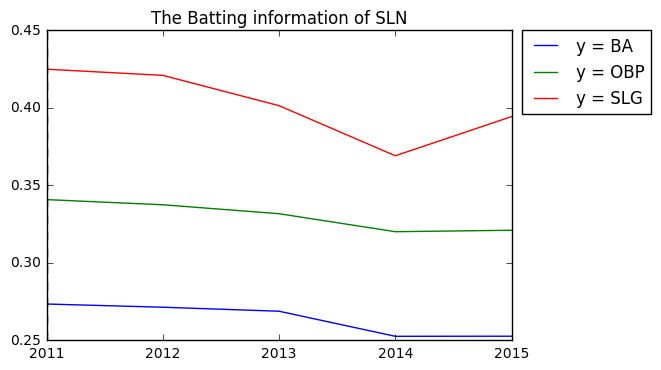

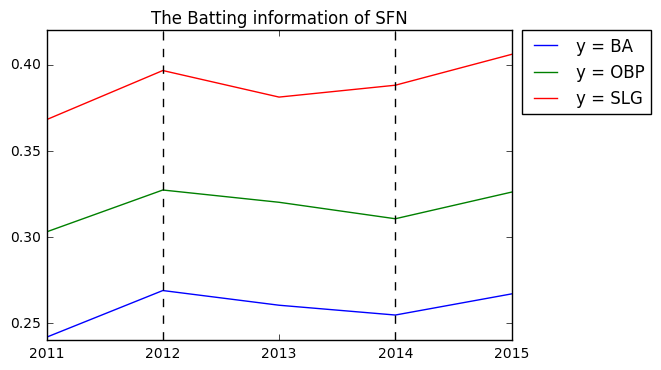

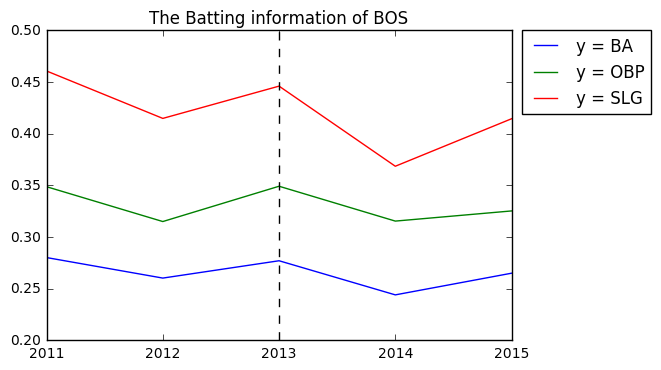

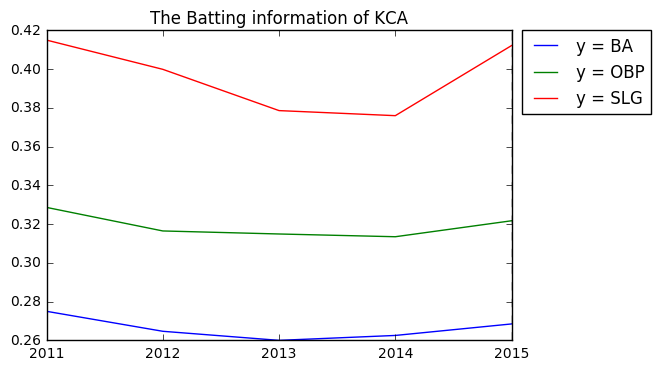

In [181]:
%matplotlib inline
winningteamlist = ['SLN','SFN','BOS','KCA']
for i in winningteamlist:
    linechart_plot1(i)

### 2.1.2 Show each team's annual pitching data

In [182]:
def linechart_plot2(teamname):
    winteam = teams.loc[teams['teamID'].isin(['SLN','SFN','BOS','KCA'])]
    team = winteam.loc[winteam['teamID'].isin([teamname])]
    x = np.array(team['yearID'])
    y = np.array(team['H/9'])
    y1 = np.array(team['PRA'])
    y2 = np.array(team['WHIP'])
    y3 = np.array(team['K/9'])
    y4 = np.array(team['BB/9'])
    y5 = np.array(team['K/BB'])
    my_xticks = x
    plt.xticks(x, my_xticks)
    plt.plot(x, y)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)
    plt.plot(x, y4)
    plt.plot(x, y5)
    plt.legend(['y = H/9', 'y = PRA', 'y = WHIP', 'y = K/9', 'y = BB/9','y = K/BB'], loc='best', borderaxespad=0.,bbox_to_anchor=(1.3, 1))
    plt.title('The Pitching information of '+teamname)
    if(teamname == 'SLN'):        
        plt.axvline(x=2011,color='k', linestyle='--')
    elif(teamname == 'SFN'):
        plt.axvline(x=2012,color='k', linestyle='--')
        plt.axvline(x=2014,color='k', linestyle='--')
    elif(teamname == 'BOS'):
        plt.axvline(x=2013,color='k', linestyle='--')
    elif(teamname == 'KCA'):
        plt.axvline(x=2015,color='k', linestyle='--')
    plt.show()

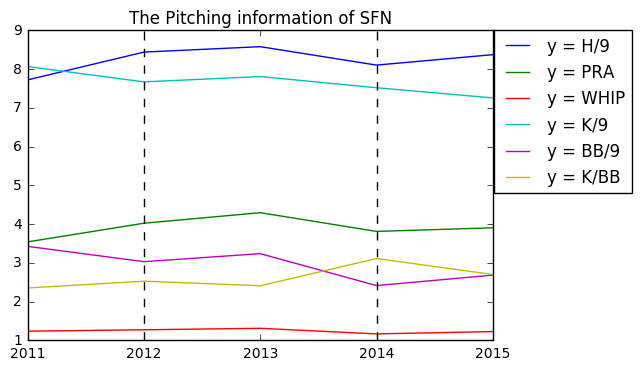

In [183]:
linechart_plot2('SFN')

### 2.1.3 Compare each team's annual data

In [184]:
def linechart_plot3(measurement):
    team1 = teams.loc[teams['teamID'].isin(['SLN'])]
    team2 = teams.loc[teams['teamID'].isin(['SFN'])]
    team3 = teams.loc[teams['teamID'].isin(['BOS'])]
    team4 = teams.loc[teams['teamID'].isin(['KCA'])]
    x = np.array(team1['yearID'])

    y = np.array(team1[measurement])
    y1 = np.array(team2[measurement])
    y2 = np.array(team3[measurement])
    y3 = np.array(team4[measurement])
    my_xticks = x
    plt.xticks(x, my_xticks)
    plt.plot(x, y)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.plot(x, y3)                         
    plt.legend(['y = SLN', 'y1 = SFN', 'y2 = BOS', 'y3 = KCA'],loc='best', borderaxespad=0.,bbox_to_anchor=(1.32, 1))
    if(measurement=='BA'):
        plt.title('Batting Average')
    elif(measurement=='OBP'):
        plt.title('One Base Percemtage')
    elif(measurement=='SLG'):
        plt.title('Slugging Percentage')
    elif(measurement=='H/9'):
        plt.title('Hits per nine innings')
    elif(measurement=='PRA'):
        plt.title('Run Average')
    elif(measurement=='WHIP'):
        plt.title('Walks plus hits per inning pitched ')
    elif(measurement=='K/9'):
        plt.title('Strikeouts per nine innings ')
    elif(measurement=='BB/9'):
        plt.title('Base on balls ')
    elif(measurement=='K/BB'):
        plt.title('Strikeout-to-walk ratio')
    plt.show()

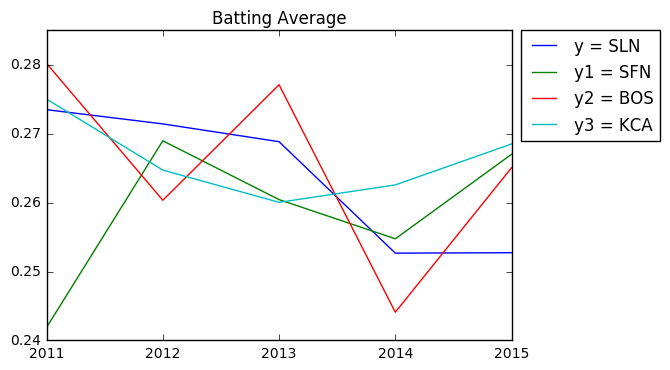

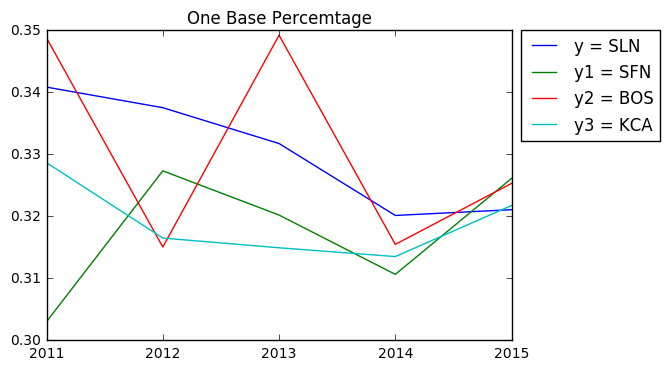

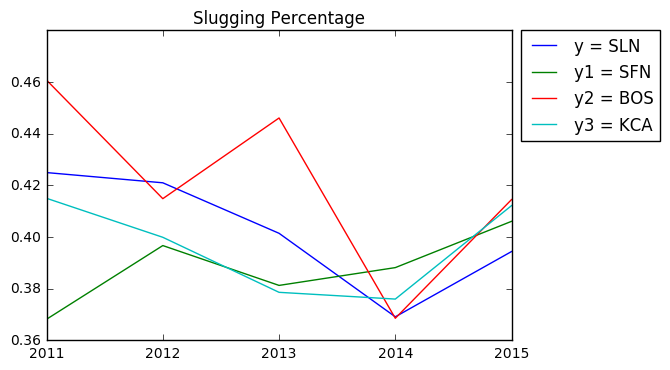

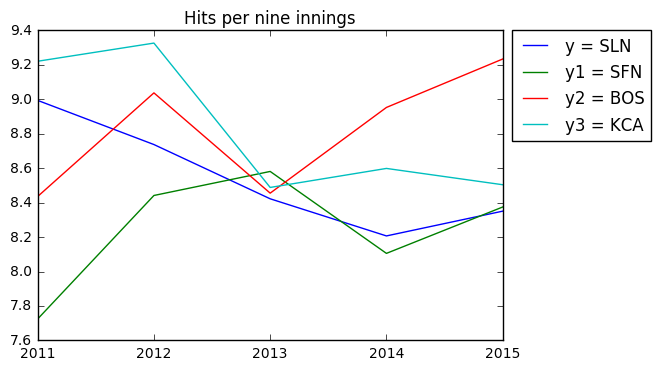

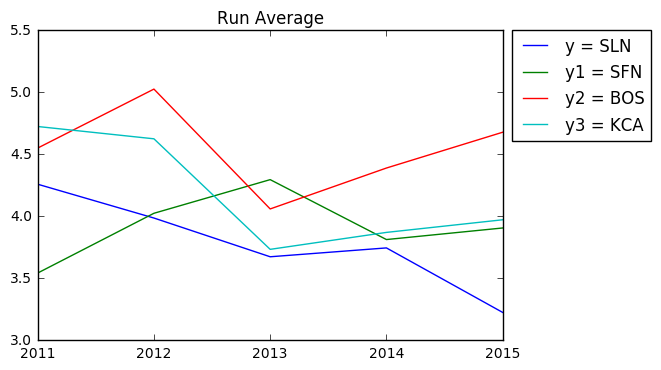

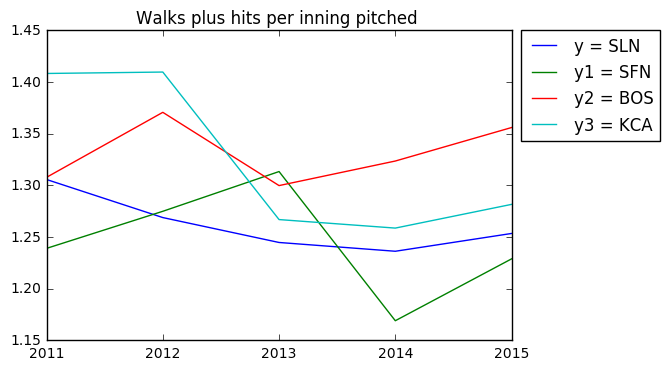

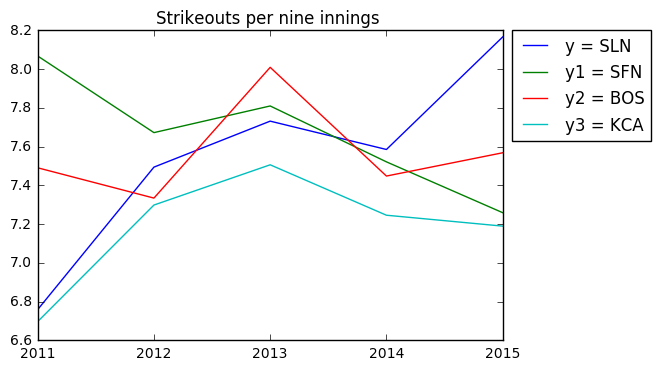

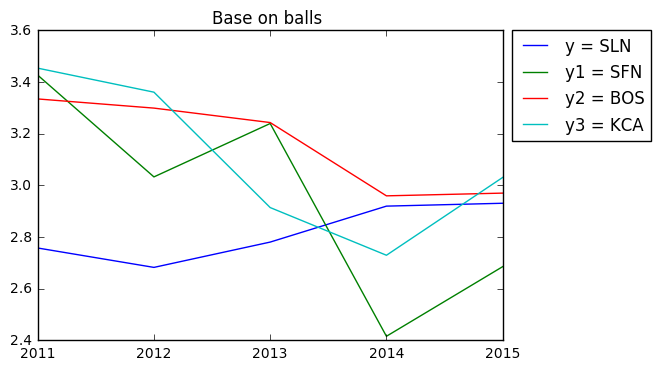

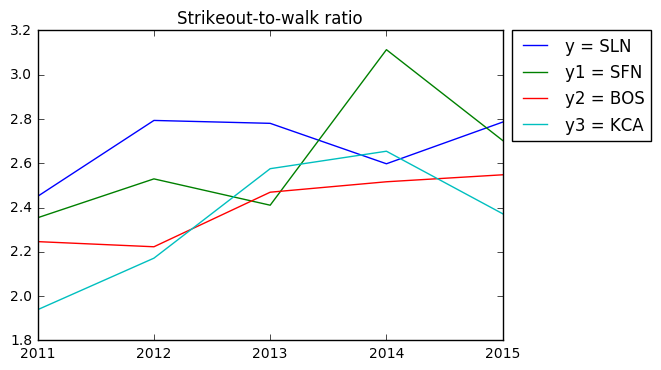

In [185]:
measurementlist = ['BA','OBP','SLG','H/9','PRA','WHIP','K/9','BB/9','K/BB']
for i in measurementlist:
    linechart_plot3(i)

## 2.2  Pie Chart

#### We insert team's name and year to show the specific data (ex: total bats)

Set up the index into team table

In [186]:
teams = teams.set_index(['yearID', 'teamID'])

In [187]:
def show_pie_chart(team, year):
    # The slices will be ordered and plotted counter-clockwise.
    labels = 'On Base', '2 Base', '3 Base', 'HomeRun'
    sizes = [(teams['H'][year, team] - teams['2B'][year, team] - teams['3B'][year, team] - teams['HR'][year, team]), 
             teams['2B'][year, team], 
             teams['3B'][year, team], 
             teams['HR'][year, team]]
    explode = (0, 0, 0, 0.2)  # only "explode" HomeRun
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.title('Team ' + str(team) + ' Batting data in ' + str(year), y=1.08)
    plt.show()

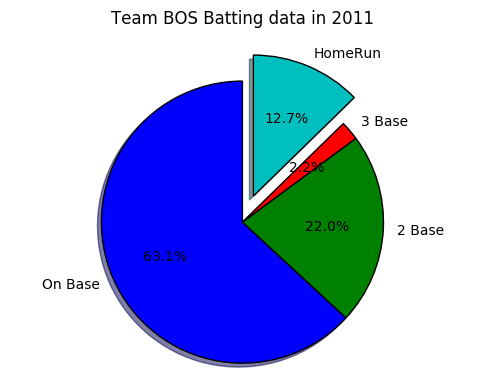

In [188]:
show_pie_chart('BOS', 2011)

## 2.3  Bar Chart

We insert data set column's name to campare each teams' specific

In [189]:
#show bar chart
def show_bar_chart(data):
    N = 5
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    SLN_salary = (teams[data][2011, 'SLN'], 
                teams[data][2012, 'SLN'], 
                teams[data][2013, 'SLN'], 
                teams[data][2014, 'SLN'], 
                teams[data][2015, 'SLN'])

    fig, ax = plt.subplots()

    rects1 = ax.bar(ind + width*0, SLN_salary, width, color='r')

    SFN_salary = (teams[data][2011, 'SFN'], 
                teams[data][2012, 'SFN'], 
                teams[data][2013, 'SFN'], 
                teams[data][2014, 'SFN'], 
                teams[data][2015, 'SFN'])
    rects2 = ax.bar(ind + width*1, SFN_salary, width, color='y')

    BOS_salary = (teams[data][2011, 'BOS'], 
                teams[data][2012, 'BOS'], 
                teams[data][2013, 'BOS'], 
                teams[data][2014, 'BOS'], 
                teams[data][2015, 'BOS'])
    rects3 = ax.bar(ind + width*2, BOS_salary, width, color='b')

    KCA_salary = (teams[data][2011, 'KCA'], 
                teams[data][2012, 'KCA'], 
                teams[data][2013, 'KCA'], 
                teams[data][2014, 'KCA'], 
                teams[data][2015, 'KCA'])
    rects4 = ax.bar(ind + width*3, KCA_salary, width, color='g')


    # add some text for labels, title and axes ticks
    ax.set_xlabel('year')
    ax.set_ylabel(str(data))
    ax.set_title(str(data) + ' in each team', y=1.1)
    ax.set_xticks(ind + width*2)
    ax.set_xticklabels(('2011', '2012', '2013', '2014', '2015'))

    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('SLN_' + str(data), 'SFN_' + str(data), 'BOS_' + str(data), 'KCA_' + str(data)), loc='best', borderaxespad=0.,bbox_to_anchor=(1.35, 1))


    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%.2f' % float(height), ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    plt.show()

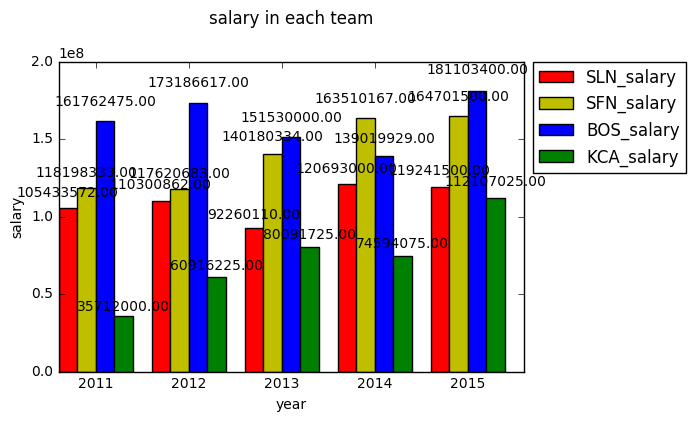

In [190]:
show_bar_chart('salary')

## 2.4 Scatter chart

We insert a specific year to show the correlation between salaries and winning persentage

We also mark out the World Series champion from 2011 to 2015

In [191]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_wins(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'SFN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'KCA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FFBF00", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FFBF00"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")) 
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)
    ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

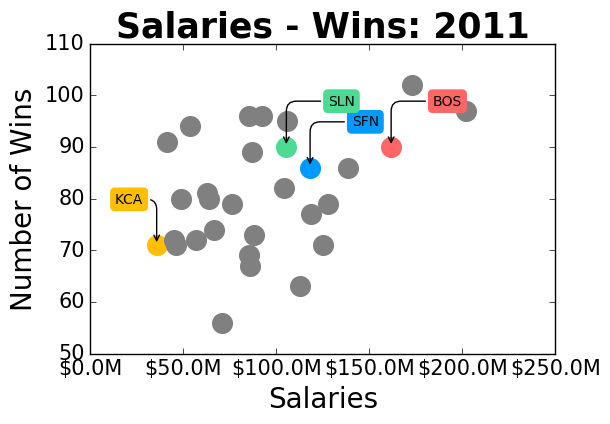

In [192]:
plot_spending_wins(teams, 2011)

In addition, We can modify the code to insert year and 2 data sets 

To know the correlation between these two sets for all teams in specific year

In [193]:
def show_plot_scatter(teams, year, data1, data2):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year[data1][i], teams_year[data2][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year[data1][i], teams_year[data2][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'SFN':
            ax.scatter(teams_year[data1][i], teams_year[data2][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year[data1][i], teams_year[data2][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year[data1][i], teams_year[data2][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year[data1][i], teams_year[data2][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))   
        elif i == 'KCA':
            ax.scatter(teams_year[data1][i], teams_year[data2][i], color="#FFBF00", s=200)
            ax.annotate(i, (teams_year[data1][i], teams_year[data2][i]),
                        bbox=dict(boxstyle="round", color="#FFBF00"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))  
        else:
            ax.scatter(teams_year[data1][i], teams_year[data2][i], color="grey", s=200)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel(str(data1), fontsize=20)
    ax.set_ylabel(str(data2), fontsize=20)
    ax.set_title(str(data1) + ' - ' + str(data2) + ': '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

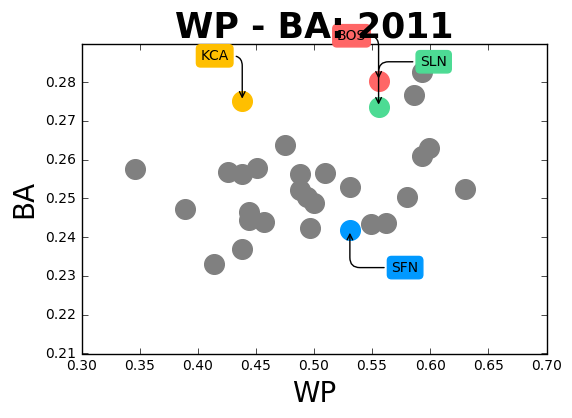

In [194]:
show_plot_scatter(teams, 2011, 'WP', 'BA')

## 2.5 bubble chart

If we want to find the correlation for more than three dimensions, we can use bubble chart.

In this case, we use winning percentage as x, on base persentage as y, and salaries as bubble size

In [195]:
def show_plot_bubble(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#4DDB94", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'SFN':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#0099FF", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#FF6666", s=teams_year['salary'][i]*1e-6)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'KCA':
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="#FFBF00", s=200)
            ax.annotate(i, (teams_year['WP'][i], teams_year['BA'][i]),
                        bbox=dict(boxstyle="round", color="#FFBF00"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        else:
            ax.scatter(teams_year['WP'][i], teams_year['BA'][i], color="grey", s=teams_year['salary'][i]*1e-6)
    #ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Winning Percentage', fontsize=20)
    ax.set_ylabel('Number of BA' , fontsize=20)
    ax.set_title('WP - BA: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

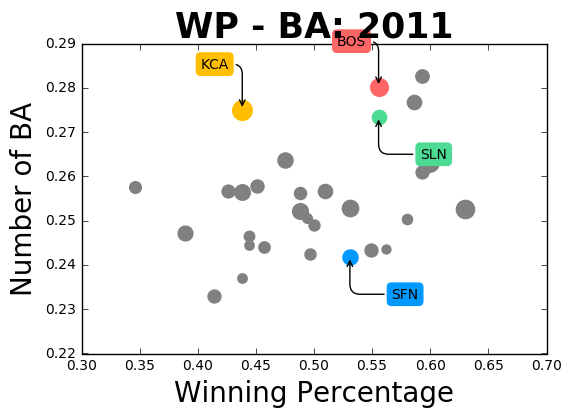

In [196]:
show_plot_bubble(teams, 2011)

In [197]:
# add battig measurements to batting data (for analyzing the player) 
Batting['BA'] = Batting['H']/Batting['AB']
Batting['OBP'] = (Batting['H'] + Batting['BB'] + Batting['HBP']) / (Batting['AB'] + Batting['BB'] + Batting['HBP'] + Batting['SF'])
Batting['SLG'] = (Batting['H'] + Batting['2B'] + (2*Batting['3B']) + (3*Batting['HR'])) / Batting['AB']

In [198]:
# filter batting data